In [ ]:
from clearml import Model, Logger
import pandas as pd
from keras.models import load_model
import numpy as np
from clearml import Task, TaskTypes
from PIL import Image
import os
import lime
import shap
from lime import lime_image
import matplotlib.pyplot as plt
from keras.utils import img_to_array, array_to_img, load_img
from keras.applications.efficientnet_v2 import preprocess_input
from skimage.segmentation import mark_boundaries
from utility import OptimizedRounder, mapping

In [ ]:
def load_jarvis_model(model_id="48a76b1277154398991d1d079db968ae"):
    model_path = Model(model_id=model_id).get_local_copy()
    model = load_model(model_path)
    return model

In [ ]:
def predict(model,img):
    pred = model.predict(img)
    optR = OptimizedRounder()
    coefficients = [0.49964604, 1.55479703, 2.4369177,  3.26701671] # Learnt while training the efficient net model.
    print(f'Coefficients: {coefficients}')
    y_val_pred = optR.predict(pred, coefficients)
    return y_val_pred

In [ ]:
def predict_lime_explain(img_path, model_id, truth_value=''):

    name = img_path.split('/')[-1].split('.')[0]    
    print(f'Image File:{name}')

    #Load Model
    model = load_jarvis_model(model_id)

    # Load your image data
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array_ml_in = np.expand_dims(img_array,axis=0)

    #Make Prediction
    prediction = predict(model, img_array_ml_in)
    print(f'prediction {prediction}')
    prediction = mapping.get(int(prediction))

    # Create a LIME explainer
    explainer = lime_image.LimeImageExplainer()
    # Explain the predictions made by the model
    explanation = explainer.explain_instance(img_array, model.predict, top_labels=1, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=10, hide_rest=False)
    fig, axe = plt.subplots(figsize=(7, 3.5))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    if truth_value:
        axe.text(180, 180, 'Actual:'+truth_value, bbox=dict(facecolor='red', alpha=0.0))
    axe.text(180, 190, 'Predicted:'+prediction, bbox=dict(facecolor='red', alpha=0.0))
    plt.show()
    fig.savefig(name+'.png')

In [ ]:
def predict_shap_explain(img_path, model_id, truth_value=''):

    name = img_path.split('/')[-1].split('.')[0]    
    print(f'Image File:{name}')

    #Load Model
    model = load_jarvis_model(model_id)

    # Load your image data
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array_ml_in = np.expand_dims(img_array,axis=0)

    #Make Prediction
    prediction = predict(model, img_array_ml_in)
    print(f'prediction {prediction}')
    prediction = mapping.get(int(prediction))

    print(img_array.shape)
    x_val = np.empty((1, 224, 224, 3), dtype=np.uint8)
    #x_val[0,:,:,:] = preprocess_image('initial_data/train_images/00a8624548a9.png')
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    x_val[0,:,:,:] = img_array

    masker = shap.maskers.Image('inpaint_telea',x_val[0].shape)
    explainer = shap.Explainer(model, masker)

    # here we use 500 evaluations of the underlying model to estimate the SHAP values
    shap_values = explainer(x_val, max_evals=500,)
    shap.image_plot(shap_values)
    

inference_Data/00cb6555d108.png
Image File:00cb6555d108
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 674ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


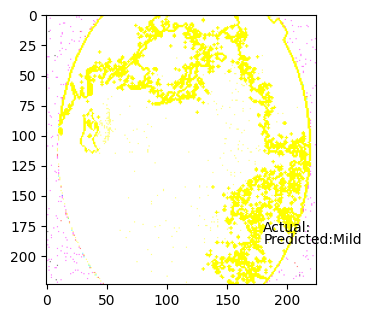

Image File:00cb6555d108
1/1 [==============================] - 3s 3s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]
(224, 224, 3)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [01:09, 69.46s/it]               


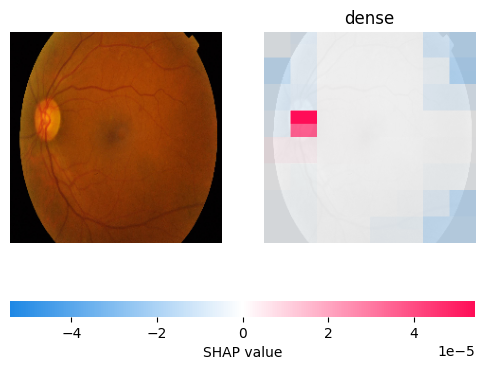

inference_Data/03c85870824c.png
Image File:03c85870824c
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 672ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


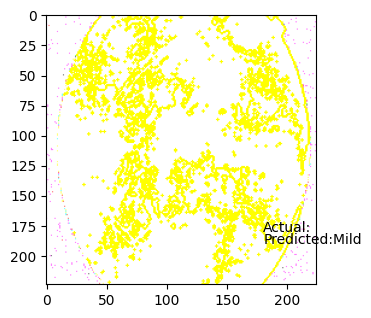

Image File:03c85870824c
1/1 [==============================] - 3s 3s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]
(224, 224, 3)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [01:11, 71.43s/it]               


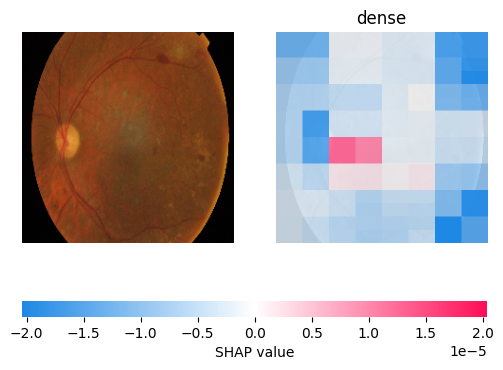

inference_Data/001639a390f0.png
Image File:001639a390f0
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 571ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


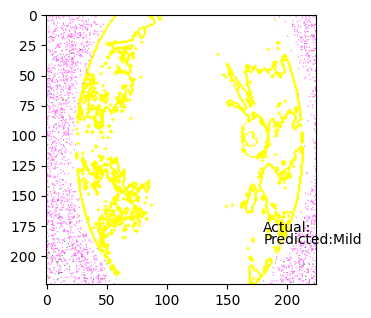

Image File:001639a390f0
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]
(224, 224, 3)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [01:16, 76.42s/it]               


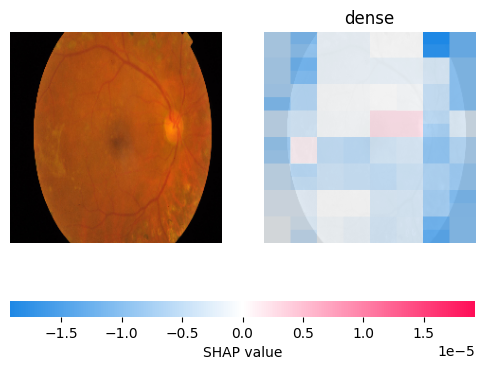

inference_Data/002c21358ce6.png
Image File:002c21358ce6
1/1 [==============================] - 4s 4s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[0.]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 680ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


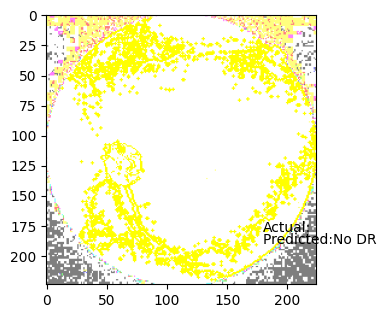

Image File:002c21358ce6
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[0.]]
(224, 224, 3)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [01:11, 71.76s/it]               


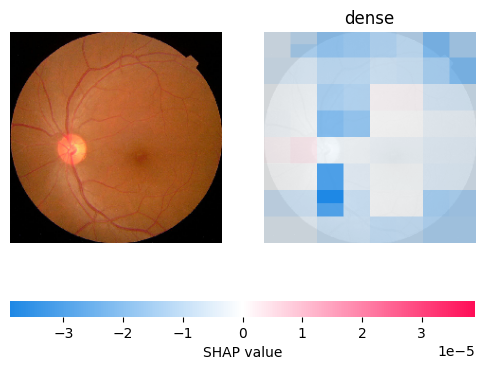

inference_Data/000c1434d8d7.png
Image File:000c1434d8d7
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 580ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


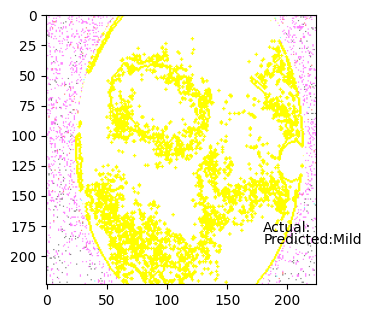

Image File:000c1434d8d7
1/1 [==============================] - 2s 2s/step
Coefficients: [0.49964604, 1.55479703, 2.4369177, 3.26701671]
prediction [[1.]]
(224, 224, 3)


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [01:18, 78.82s/it]               


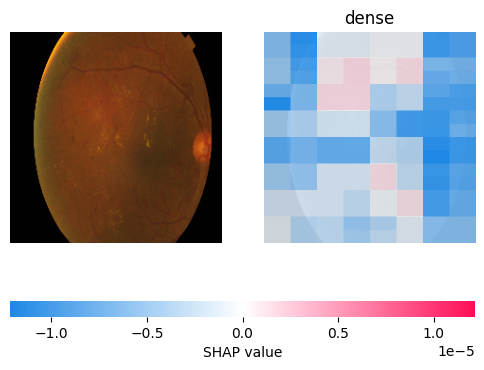

In [25]:
for file in os.listdir('inference_Data'):
    if file.split('.')[-1]=='png':
        print('inference_Data/' + file)
        file_path = 'inference_Data/' + file        
        predict_lime_explain(file_path,model_id='48a76b1277154398991d1d079db968ae')
        predict_shap_explain(file_path,model_id='48a76b1277154398991d1d079db968ae')
        

In [ ]:
predict_lime_explain('initial_data/train_images/00a8624548a9.png',model_id='48a76b1277154398991d1d079db968ae', truth_value='')

In [ ]:
predict_lime_explain('initial_data/train_images/0243404e8a00.png',model_id='48a76b1277154398991d1d079db968ae', truth_value='')

In [ ]:
predict_shap_explain('initial_data/train_images/00a8624548a9.png',model_id='48a76b1277154398991d1d079db968ae', truth_value='')

In [ ]:
predict_shap_explain('initial_data/train_images/0243404e8a00.png',model_id='48a76b1277154398991d1d079db968ae', truth_value='')

In [ ]:
from clearml import Model, Logger
import pandas as pd
from keras.models import load_model
import numpy as np
from utility import preprocess_image, OptimizedRounder
from clearml import Task, TaskTypes
from PIL import Image
import os
import shap
from keras.utils import img_to_array,load_img
""" task = Task.init(project_name='Diabetic_Retinopathy_Detection', 
                 task_name='Retinopathy Inference', 
                 task_type=TaskTypes.inference,
                 reuse_last_task_id=False
                 ) """

# Create an input model using the ClearML ID of a model already registered in the ClearML platform
model_path = Model(model_id="48a76b1277154398991d1d079db968ae").get_local_copy()
model = load_model(model_path)

x_val = np.empty((1, 224, 224, 3), dtype=np.uint8)
#x_val[0,:,:,:] = preprocess_image('initial_data/train_images/00a8624548a9.png')
img = load_img('initial_data/train_images/00a8624548a9.png', target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
x_val[0,:,:,:] = img_array

masker = shap.maskers.Image('inpaint_telea',x_val[0].shape)
explainer = shap.Explainer(model, masker)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(x_val, max_evals=500)
shap.image_plot(shap_values)


In [ ]:
shap_values.shape

In [ ]:
model_path = Model(model_id="48a76b1277154398991d1d079db968ae").get_local_copy()
model = load_model(model_path)
print(model.summary())

# Load your image data
img = load_img('initial_data/train_images/00a8624548a9.png', target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array.shape

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the predictions made by the model
explanation = explainer.explain_instance(img_array, model.predict, top_labels=1, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [ ]:
predict_explain('initial_data/train_images/00a8624548a9.png', model, truth_value='')

In [ ]:
fig, axe = plt.subplots(figsize=(7, 3.5))
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
axe.text(180, 190, "No DR", bbox=dict(facecolor='red', alpha=0.0))
plt.show()